In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

## Data

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



case the URL is a string 
the file is either Union means either over a path or a string and it defaults to nothing
the destination is either a path or a string of defaults to nothing

## Pets data:

12 cat breeds and 25 dogs breeds -- 37 categories

In [5]:
path = untar_data(URLs.PETS)

In [6]:
path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations')]

#### Python3 - path objects

In [8]:
path_anno = path/'annotations'
path_img = path/'images'

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pomeranian_123.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bengal_87.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Ragdoll_52.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_54.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/samoyed_165.jpg')]

labels are part of the filenames. the labels are to be extracted from the filenames

In [10]:
np.random.seed(2)

In [11]:
pat = r'/([^/]+)_\d+.jpg$'

ImageDataBunch represnts all the data to build the model. The data is categorised into training and validated set

to extract the labels from names we use from_name_re



In [12]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224)

The size of the images we need to work with, the GPU processes all these instructions for all the images at the same time to make things faster. so if the images are of different size, we cannot make it happen. so we make all the images of the same size and shape

we always use to make images of same shape - square == 224 * 224

Dataset class is an abstract class of the pytorch uses getitem and length -- this defines what dataset needs to do

getitem -- getitem[3] -- it gives 3rd indexed item -- returns an image and the lable of what an image is

length -- it gives length of the dataset

We need to have a few items at a time in minibatches (SGD) for GPUs to work in parallel


To create a minibatch, we use DataLoader -- it takes dataset in the constructor and grab items at random and creates a batch and gives it to GPU. 


To train a model, we need to have a validation set along with the trainign set--- this si Databunch..

Databunch uses training dataloader and validation dataloader

At the end we get databunch object

### In fastai, everything we model is going to be a data bunch object


DAta bunch object has training and validation along with test data-- images and lables 

In [13]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,Bengal,Ragdoll,Egyptian_Mau,Sphynx
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
havanese,Abyssinian,Birman,Russian_Blue,american_pit_bull_terrier
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None

Normalizing the images -- pixel values of R,G,B might result in some channels with varying in intensity and different distribution. we normalize it to get with mean of 0 and std of 1

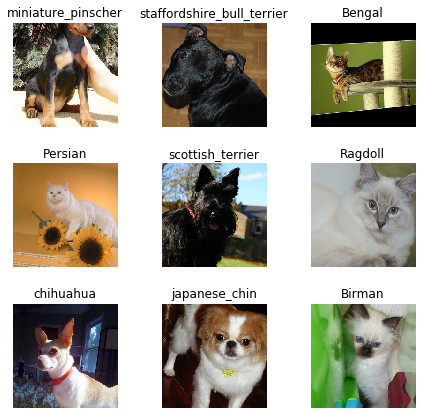

In [14]:
data.show_batch(rows=3,figsize=(6,6))

All the images are centre cropped and resized



## labels

In [15]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [16]:
len(data.classes)

37

In [17]:
data.c

37

## Training resnet34

resnet34 is a smaller one and it trains faster

In [19]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jupyter/.cache/torch/checkpoints/resnet34-333f7ec4.pth


metrics -- things that get printed out

it downloads, resnet34 pretrained weights--- it already trained on different millions of images. we can download pretrained weights of 1000s of categories of the various images in imagenet data

THIS IS CALLED TRANSFER LEARNING

resnet34 is just a function -- it does not take any space or storage


error rate = 1- accuracy

accuracy == which prediction == actual value -- mean of this


metrics is usually done on the validation set

In [21]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.386899,0.318046,0.102165,00:45
1,0.617837,0.263546,0.074425,00:44
2,0.377242,0.230903,0.077808,00:44
3,0.267879,0.220867,0.071719,00:44


the output also has a valid_loss

the data has validation set to avoid overfitting

The error_rate is very less ( error rate 7%) and has improved a lot over the course of 4 cycles (epochs) -- each cycle goes through the datasets and estimate the labels

in a total time of 1 minute 76 seconds we got a error rate of 7% and accuracy of 93% 

In [22]:
learn.save('stage-1')

## Results

learn object has 1. data and 2. model 

this is passed to from_learner

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

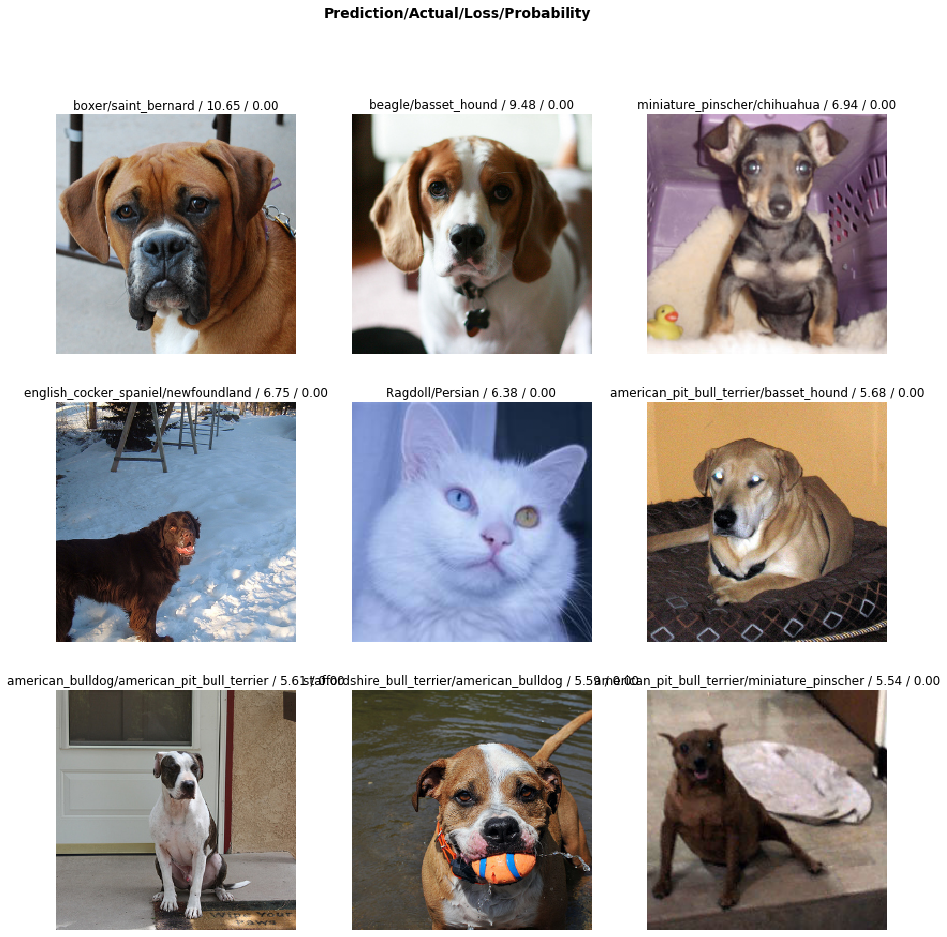

In [27]:
interp.plot_top_losses(9,figsize=(15,15))

Loss function tells how good was the prediciton. 

Top losses tells if the model predicts something with a high confidence but the prediction is wrong.



In [29]:
doc(interp.plot_top_losses) 

## DOC IS SIMILAR TO HELP BUT IT GIVES LINK TO DOCUMENTATION

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = False , heatmap_thresh : int = 16 , alpha : float = 0.6 , cmap : str = 'magma' , show_text : bool = True , return_fig : bool = None ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

#### top_losses prints, prediction, actual, loss, and probability of actual class.

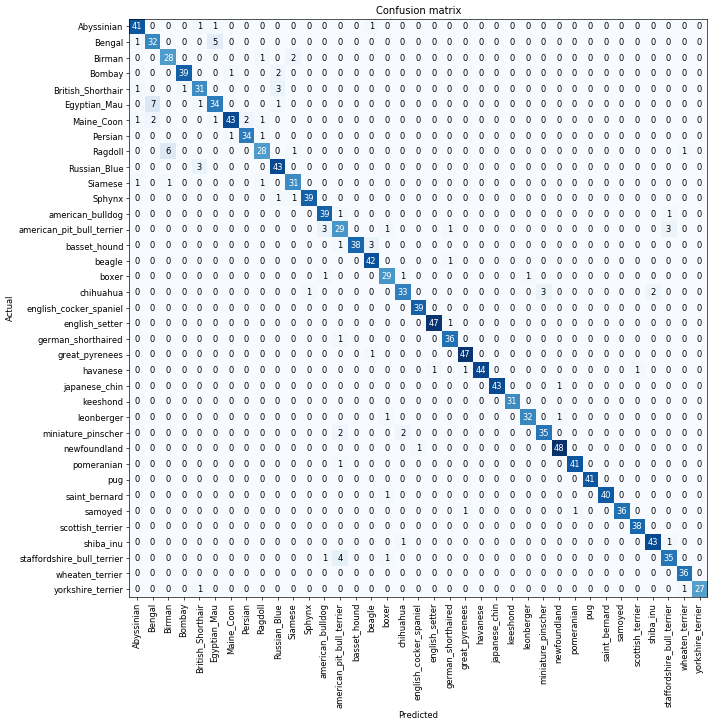

In [30]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

If there are a lot of classes, do not use confusion matrix because it is hard to interpret

In [31]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 7),
 ('Ragdoll', 'Birman', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('basset_hound', 'beagle', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Birman', 'Siamese', 2),
 ('Bombay', 'Russian_Blue', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Maine_Coon', 'Persian', 2),
 ('chihuahua', 'shiba_inu', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

#### The output here is it Actual , predicted, number of times predicted 

## Making model better

### Fine tuning

So far we fit 4 epochs-- it ran very quickly, the CNN has many layers. we added a few extra layers at the end and only tuned those layers.. 

if we have a pre trained model like imagenet data-- it works well. 

But to improve it further, we need to go back and train the entire model. It works as a two stage process 

by default when we call fit_one_cycle on cnn_learner -- it fine tunes the extra layer at the end and does not overfit

to train the whole model, we use something called unfreeze

Unfreeze trains the whole model

In [32]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.701847,0.434953,0.129905,00:41


The error got much worse compared to the original model we trained


Reason:

in CNN the RGB channels have information about the images. each image goes through different layers during training process. Resnet34 has 34 layers. Resnet50 has 50 layers


1. The layer1 of CNN extracts the diagonal lines or gradients. Layer1 is given as input to layer2

2. The layer2 extracts corners, curves, edges

3. Layer 3 finds combinations of both.. repeating patterns of the objects, with edges curves etc

4. Layer 4 gets dog faces, bird legs etc from the images

5. layer 5 we get a few facial features

as we go on with the layers further, we categorize the images




When we first trained the pretrained model using cnn learner, we had kept all these initial layers intact
We just trained a few more layers on the top

Whereas in the fine tuning, we are changing all these inside linitial layers too and training them back. It is very unlikely that we make the initial layer features better. because the curves, edges etc does not change.

Whereas the last layers can be changed




### This is the reason, when we unfreeze the model and trained all the layers at the same rate, we got much higher error rate

So to change it we need to go back to the model which was saved using the cnn learner

In [35]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,Bengal,Ragdoll,Egyptian_Mau,Sphynx
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
havanese,Abyssinian,Birman,Russian_Blue,american_pit_bull_terrier
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=

In [36]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Learning rate finder figures out what it is the fastest we can train the neural network at

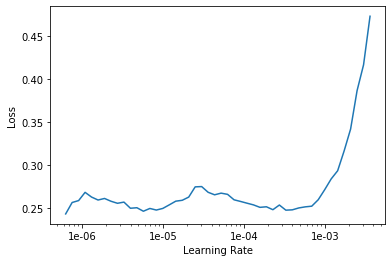

In [37]:
learn.recorder.plot()

This plot shows how quickly we are updating the parameters in the model. It is loss vs lr. once, lr passed 10^-4, the loss increases for this model


However, the default learning rate for fit_one_cycle is 0.003. That is the reason the loss is high,

Based on this plot, we pick the learning rate range which has low loss values



In [38]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.226211,0.212159,0.065629,00:42
1,0.220359,0.206440,0.070365,00:42


In the initial case, we had just trained the later layers with the default learning rate. The results were fine. However, after we included the initial layers, the error rate increased. Thus, it is only the initial layers that require a different learning rate that is around 1e-06


In this, we train the very first layers with 1e-6 and the later layers with 1e-4. The inbetween layers are distributed in between those two values

This range is passed using slice as shown above


intial model resulted in 7.1 % error rate. Now, the error rate has decreased. This is accurate model with 7% error rate with just additional 2 epochs. 



#### Most of the time, these two stages are sufficient to increase the accuracy

## Resent 50

We are adding more layers to improve the results

Resnet50 has more layers and it requires more computational capacity and can run out of memory and become slow. To increase the speed of the computation, we can decrease the batch size. Smaller batchsize takes longer time to compute

In [39]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),
                                  size=299,bs=bs//2).normalize(imagenet_stats)

In [40]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jupyter/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [41]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.748504,0.384213,0.106225,01:10
1,0.484585,0.278831,0.077131,01:06
2,0.338080,0.229507,0.070365,01:06
3,0.229489,0.192899,0.056834,01:06
4,0.156731,0.177342,0.051421,01:06


The error rate is 5.1%. Resnet50 is a very good model

In [42]:
learn.save('stage-1-50')

In [43]:
learn.unfreeze()
learn.fit_one_cycle(1,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.132902,0.185102,0.054804,01:09


There is no much improvement. but can be improved if we add more epochs

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

In [45]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 7),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Persian', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('Birman', 'Ragdoll', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]

## Other data formats

Creating labels in the earlier case was from the path and using regex

But not all the times we get the data in that format. We might have different formats

### From folder

In [46]:
path = untar_data(URLs.MNIST_SAMPLE)

In [47]:
path

PosixPath('/home/jupyter/.fastai/data/mnist_sample')

In [48]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_sample/train'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/valid')]

MNIST sample has already training and validation set

In [49]:
(path/'train').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/7')]

In the patht train, we have 2 folders -- 3 and 7.. all the images that are 3 are put in 3. all the images that are 7 are put in 7 -- imagenet datastyle

For this format, we can use from_folder

In [50]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,size=26)

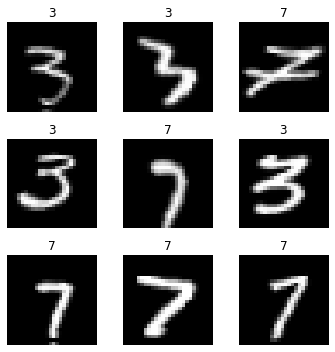

In [51]:
data.show_batch(rows=3,figsize=(5,5))

In [52]:
learn = cnn_learner(data,models.resnet18,metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jupyter/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.206852,0.115113,0.955839,00:09
1,0.115721,0.045012,0.988224,00:09


Here we are using fit instead of fit_one_cycle 

metrics is accuracy instead of error rate

Accuracy prediction is very high in just 2 epochs

### From csv

In [54]:
df = pd.read_csv(path/'labels.csv')

In [55]:
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


This is the same MNIST data set, with 3 and 7 categories. but instead of folders, we have labels. label.csv has a column called label and it is 0 for 3 and 1 for 7

In [56]:
data = ImageDataBunch.from_csv(path,ds_tfms=tfms,size=28)

As the filename is labels.csv, we need not pass the filenames in csv_label. else pass the filename

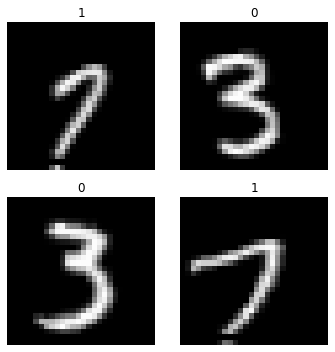

In [57]:
data.show_batch(rows=2,figsize=(5,5))

In [58]:
data.classes

[0, 1]

### from paths

In [59]:
fn_paths = [path/name for name in df['name']]

In [61]:
fn_paths[1:5]

[PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/21102.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/31559.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/46882.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/26209.png')]

sometimes fo the paths, we can use regular expression or custom defined lambda function

In [62]:
lf = lambda x:'3' if '/3' in str(x) else '7'

In [63]:
data = ImageDataBunch.from_name_func(path,fn_paths,ds_tfms=tfms,
                                    size=24,label_func=lf)

In [64]:
data.classes

['3', '7']

## From actual lables list

In [65]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]

In [66]:
labels[:5]

['3', '3', '3', '3', '3']

In [67]:
data = ImageDataBunch.from_lists(path,fn_paths, labels=labels,
                                ds_tfms = tfms, size=24 )

In [68]:
data.classes

['3', '7']

## Help on all these

In [69]:
doc(ImageDataBunch)

class ImageDataBunch [source] [test] ImageDataBunch ( train_dl : DataLoader , valid_dl : DataLoader , fix_dl : DataLoader = None , test_dl : Optional [ DataLoader ]= None , device : device = None , dl_tfms : Optional [ Collection [ Callable ]]= None , path : PathOrStr = '.' , collate_fn : Callable = 'data_collate' , no_check : bool = False ) :: DataBunch 
 
 × No tests found for ImageDataBunch . To contribute a test please refer to this guide and this discussion . DataBunch suitable for computer vision. 
 Show in docs

## DATABLOCK API

https://docs.fast.ai/data_block.html

## The jupyter notebooks 

https://github.com/fastai/fastai/tree/master/docs_src

https://github.com/fastai/fastai/blob/master/docs_src/vision.data.ipynb